In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "/Users/lili/dropbox_lili/blackSheep/pythonPackage/")
import blacksheep as blsh

### Reading in data

In [2]:
values = pd.read_csv('brca/phospho_common_samples_data.csv', index_col=0)

annotations = pd.read_csv('brca/annotations_common_samples.csv', index_col=0)

for col in ['GATA3 Mutation','PIK3CA Mutation','TP53 Mutation']:
    new_col = '.'.join(col.split()+['Status'])
    annotations[new_col] = annotations[col].isnull()==False

annotations = blsh.binarize_annotations(annotations[[
    'PAM50', 
    'ER Status', 
    'PR Status', 
    'GATA3.Mutation.Status',
    'PIK3CA.Mutation.Status',
    'TP53.Mutation.Status'
]])

### Running pipeline

In [3]:
outliers, qvalues = blsh.run_outliers(values, annotations)

In [3]:
# with open('outliers_qvals_pickle.txt', 'wb') as fh:
#     pickle.dump([outliers, qvalues], fh)

# with open('outliers_qvals_pickle.txt', 'rb') as fh:
#     outliers, qvalues = pickle.load(fh)

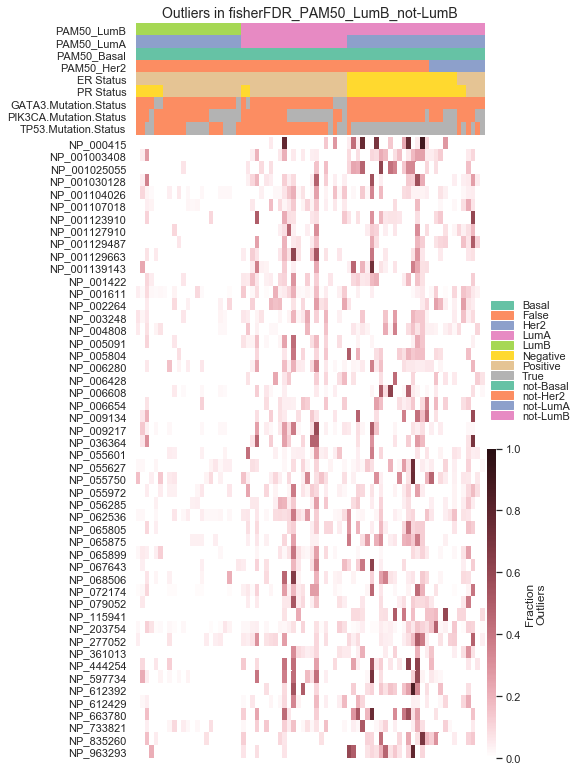

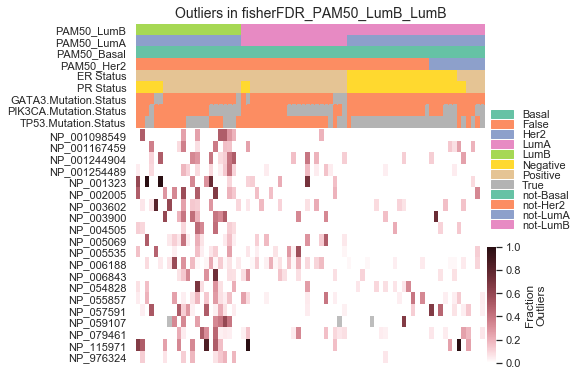

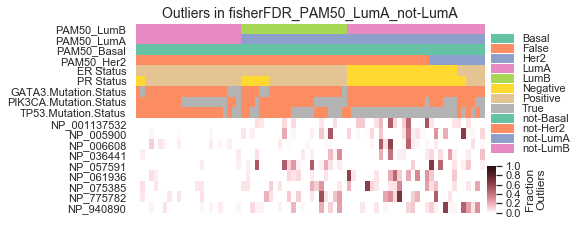

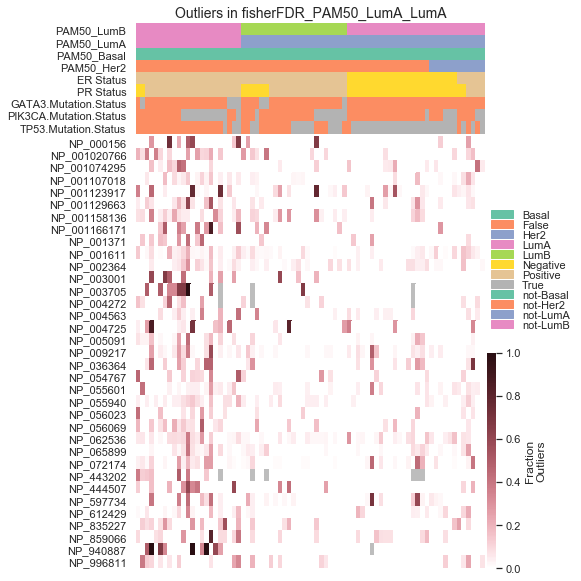

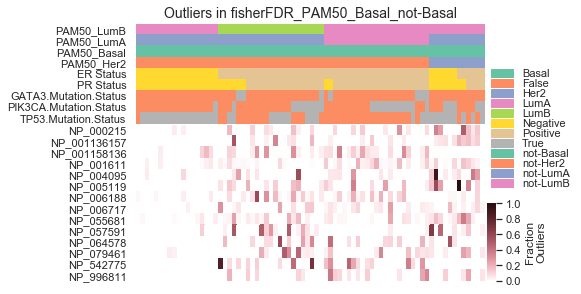

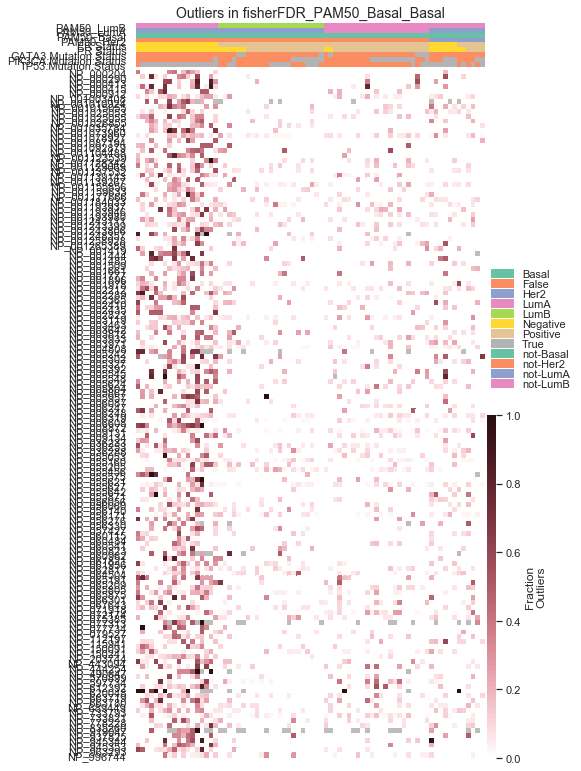

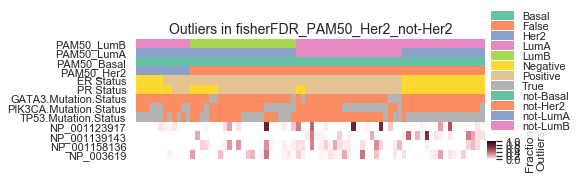

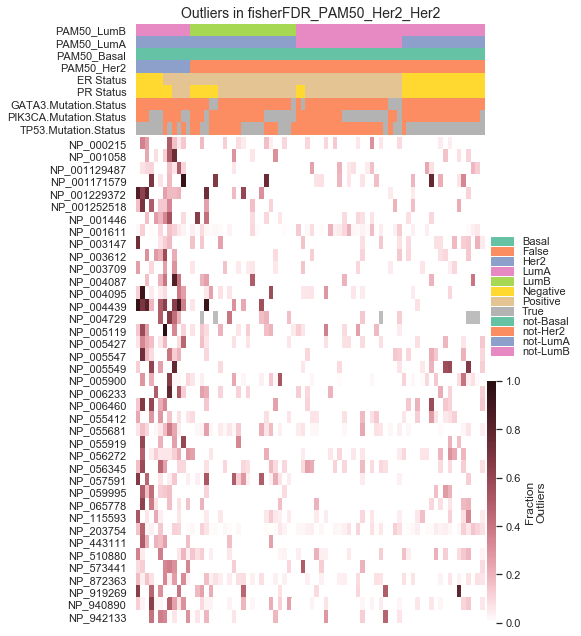

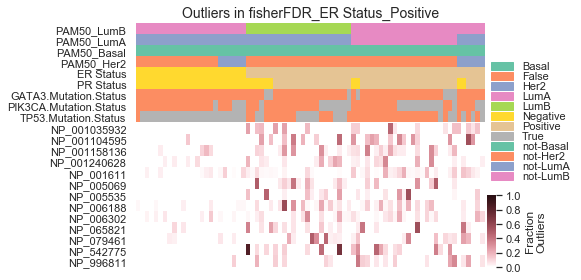

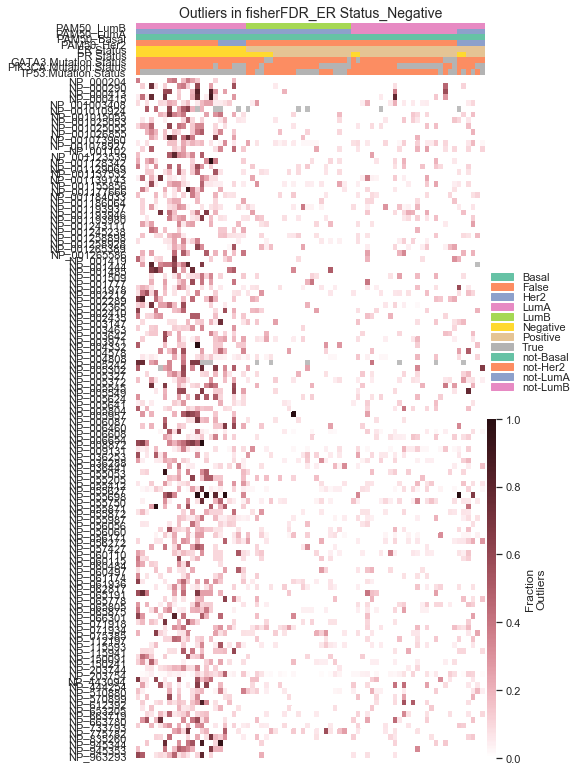

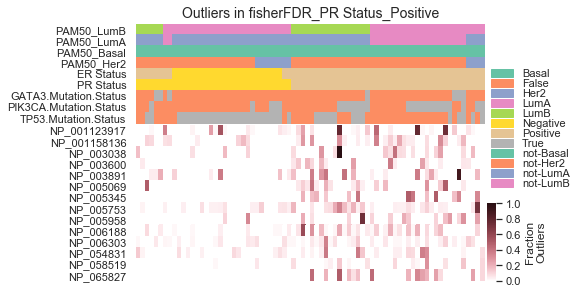

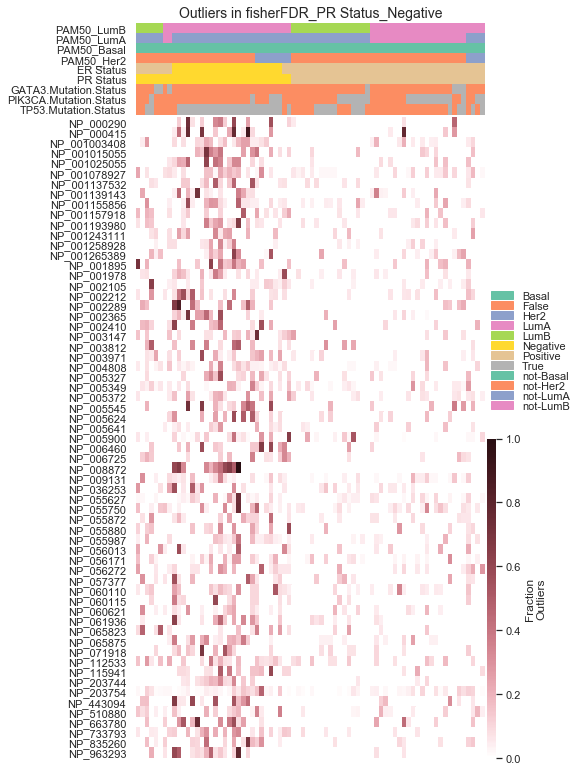

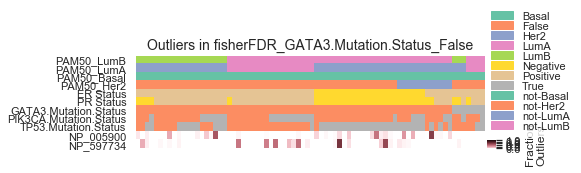

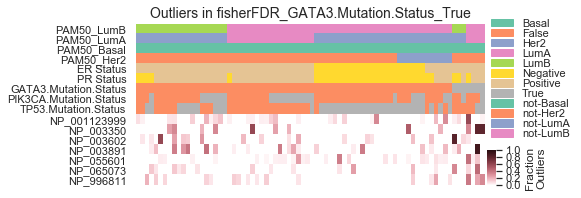

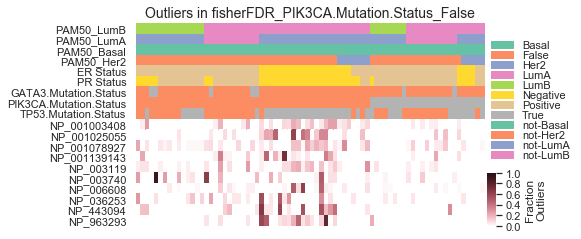

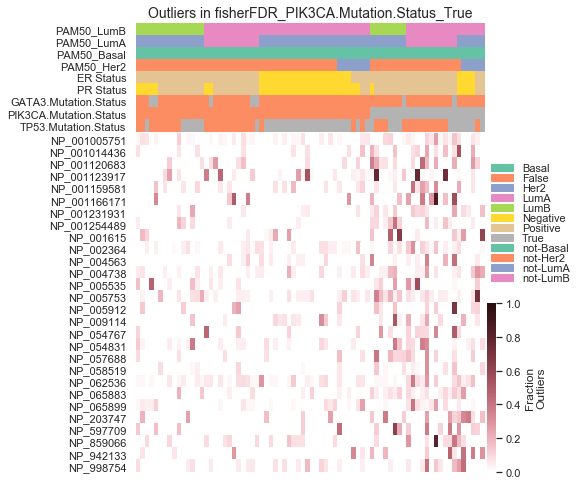

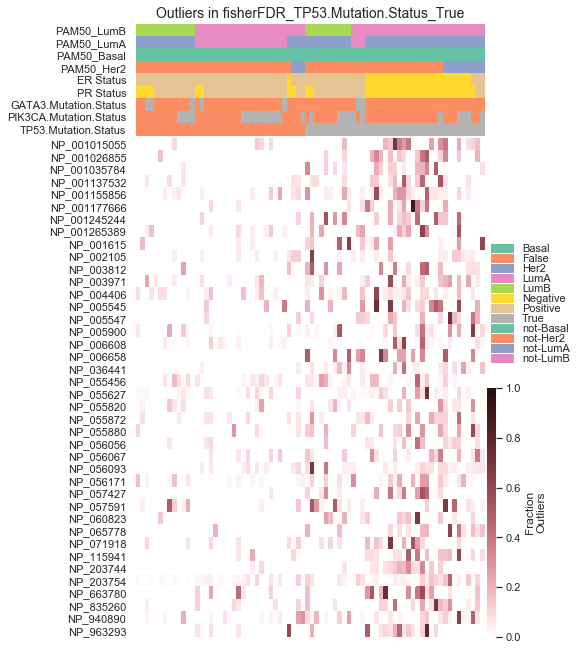

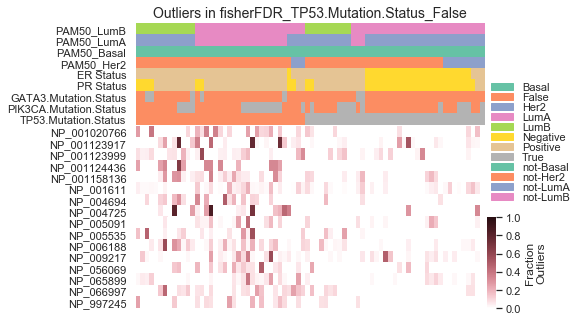

In [4]:
for col in qvalues.df.columns:
    blsh.plot_heatmap(
        annotations=annotations, 
        qvals=qvalues.df, 
        col_of_interest=col,
        vis_table=outliers.frac_table, 
        fdr=0.001, 
        output_prefix="brca_signficant_outliers",
        savefig=True
    )
    plt.show()
    plt.close()